# MLP in Tensorflow with Best Hyperparameters

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.math import argmax

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import wandb
from wandb.keras import WandbCallback

from matplotlib import pyplot as plt

from pprint import pprint

In [3]:
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:
api = wandb.Api()
sweep = api.sweep("nsiete23/tf_mlp/sweeps/ez31t9fh")

best_config = sweep.best_run().config
pprint(best_config)

wandb: Sorting runs by +summary_metrics.val_loss


{'batch_size': 128,
 'dense_1': 359,
 'dense_2': 179,
 'dense_3': 137,
 'dense_4': 64,
 'epochs': 20,
 'learning_rate': 0.058011500502312935,
 'momentum': 0.04032910145774373}


## Define training functions

In [5]:
def create_model(config):
    model = Sequential([
        Rescaling(scale=1./255, input_shape=(28, 28)),
        Flatten(),
        
        Dense(config.dense_1, activation='relu'),
        Dense(config.dense_2, activation='relu'),
        Dense(config.dense_3, activation='relu'),
        Dense(config.dense_4, activation='relu'),

        Dense(10, activation='softmax'),
    ])

    return model

In [6]:
def compile_model(model, config):
    model.compile(
        optimizer=SGD(learning_rate=config.learning_rate, momentum=config.momentum),
        loss=SparseCategoricalCrossentropy(),
        metrics=[SparseCategoricalAccuracy()]
    )

In [7]:
def train_model(model, config, x_train, y_train):
    history = model.fit(
        x_train,
        y_train,
        epochs=config.epochs,
        validation_split=0.2,
        batch_size=config.batch_size,
        shuffle=True,
        callbacks=[
            WandbCallback()
        ]
    )

    return history

## Load dataset and train

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
wandb.init(config=best_config, project='tf_mlp', name='best-mlp-tf')

config = wandb.config

mlp = create_model(config)
mlp.summary()
compile_model(mlp, config)
history = train_model(mlp, config, x_train, y_train)

wandb.finish()

4422102/4422102 [==============================] - 1s 0us/step


wandb: Currently logged in as: v-modroczky (nsiete23). Use `wandb login --relogin` to force relogin


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28)            0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 359)               281815    
                                                                 
 dense_1 (Dense)             (None, 179)               64440     
                                                                 
 dense_2 (Dense)             (None, 137)               24660     
                                                                 
 dense_3 (Dense)             (None, 64)                8832      
                                                                 
 dense_4 (Dense)             (None, 10)                6

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/20
358/375 [===========================>..] - ETA: 0s - loss: 0.7584 - sparse_categorical_accuracy: 0.7355

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230225_195238-obrbmmve/files/model-best)... Done. 0.1s


375/375 [==============================] - 5s 8ms/step - loss: 0.7488 - sparse_categorical_accuracy: 0.7385 - val_loss: 0.5002 - val_sparse_categorical_accuracy: 0.8225
Epoch 2/20
372/375 [============================>.] - ETA: 0s - loss: 0.4668 - sparse_categorical_accuracy: 0.8330

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230225_195238-obrbmmve/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 8ms/step - loss: 0.4669 - sparse_categorical_accuracy: 0.8330 - val_loss: 0.4444 - val_sparse_categorical_accuracy: 0.8403
Epoch 3/20
371/375 [============================>.] - ETA: 0s - loss: 0.4092 - sparse_categorical_accuracy: 0.8510

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230225_195238-obrbmmve/files/model-best)... Done. 0.1s


375/375 [==============================] - 2s 7ms/step - loss: 0.4096 - sparse_categorical_accuracy: 0.8510 - val_loss: 0.3945 - val_sparse_categorical_accuracy: 0.8553
Epoch 4/20
367/375 [============================>.] - ETA: 0s - loss: 0.3747 - sparse_categorical_accuracy: 0.8643

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230225_195238-obrbmmve/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 7ms/step - loss: 0.3749 - sparse_categorical_accuracy: 0.8642 - val_loss: 0.3889 - val_sparse_categorical_accuracy: 0.8611
Epoch 5/20
369/375 [============================>.] - ETA: 0s - loss: 0.3558 - sparse_categorical_accuracy: 0.8705

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230225_195238-obrbmmve/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 8ms/step - loss: 0.3562 - sparse_categorical_accuracy: 0.8704 - val_loss: 0.3853 - val_sparse_categorical_accuracy: 0.8611
Epoch 6/20
375/375 [==============================] - ETA: 0s - loss: 0.3349 - sparse_categorical_accuracy: 0.8781

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230225_195238-obrbmmve/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 7ms/step - loss: 0.3349 - sparse_categorical_accuracy: 0.8781 - val_loss: 0.3783 - val_sparse_categorical_accuracy: 0.8633
Epoch 7/20
354/375 [===========================>..] - ETA: 0s - loss: 0.3241 - sparse_categorical_accuracy: 0.8820

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230225_195238-obrbmmve/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 7ms/step - loss: 0.3234 - sparse_categorical_accuracy: 0.8821 - val_loss: 0.3567 - val_sparse_categorical_accuracy: 0.8695
Epoch 8/20
374/375 [============================>.] - ETA: 0s - loss: 0.3086 - sparse_categorical_accuracy: 0.8866

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230225_195238-obrbmmve/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 7ms/step - loss: 0.3084 - sparse_categorical_accuracy: 0.8866 - val_loss: 0.3554 - val_sparse_categorical_accuracy: 0.8703
Epoch 9/20
359/375 [===========================>..] - ETA: 0s - loss: 0.2973 - sparse_categorical_accuracy: 0.8901

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230225_195238-obrbmmve/files/model-best)... Done. 0.1s


375/375 [==============================] - 2s 7ms/step - loss: 0.2975 - sparse_categorical_accuracy: 0.8898 - val_loss: 0.3392 - val_sparse_categorical_accuracy: 0.8772
Epoch 10/20
363/375 [============================>.] - ETA: 0s - loss: 0.2876 - sparse_categorical_accuracy: 0.8949

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230225_195238-obrbmmve/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 7ms/step - loss: 0.2870 - sparse_categorical_accuracy: 0.8950 - val_loss: 0.3381 - val_sparse_categorical_accuracy: 0.8746
Epoch 11/20
358/375 [===========================>..] - ETA: 0s - loss: 0.2775 - sparse_categorical_accuracy: 0.8961

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230225_195238-obrbmmve/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 8ms/step - loss: 0.2770 - sparse_categorical_accuracy: 0.8962 - val_loss: 0.3206 - val_sparse_categorical_accuracy: 0.8798
Epoch 12/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2644 - sparse_categorical_accuracy: 0.9020 - val_loss: 0.3351 - val_sparse_categorical_accuracy: 0.8775
Epoch 13/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2581 - sparse_categorical_accuracy: 0.9042 - val_loss: 0.3315 - val_sparse_categorical_accuracy: 0.8793
Epoch 14/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2507 - sparse_categorical_accuracy: 0.9070 - val_loss: 0.3312 - val_sparse_categorical_accuracy: 0.8773
Epoch 15/20
374/375 [============================>.] - ETA: 0s - loss: 0.2538 - sparse_categorical_accuracy: 0.9067

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230225_195238-obrbmmve/files/model-best)... Done. 0.1s


375/375 [==============================] - 2s 7ms/step - loss: 0.2537 - sparse_categorical_accuracy: 0.9066 - val_loss: 0.3049 - val_sparse_categorical_accuracy: 0.8881
Epoch 16/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2375 - sparse_categorical_accuracy: 0.9127 - val_loss: 0.3083 - val_sparse_categorical_accuracy: 0.8882
Epoch 17/20
355/375 [===========================>..] - ETA: 0s - loss: 0.2302 - sparse_categorical_accuracy: 0.9140

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230225_195238-obrbmmve/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 8ms/step - loss: 0.2294 - sparse_categorical_accuracy: 0.9141 - val_loss: 0.2996 - val_sparse_categorical_accuracy: 0.8928
Epoch 18/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2253 - sparse_categorical_accuracy: 0.9156 - val_loss: 0.3378 - val_sparse_categorical_accuracy: 0.8783
Epoch 19/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2136 - sparse_categorical_accuracy: 0.9210 - val_loss: 0.3075 - val_sparse_categorical_accuracy: 0.8901
Epoch 20/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2119 - sparse_categorical_accuracy: 0.9211 - val_loss: 0.3402 - val_sparse_categorical_accuracy: 0.8827


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▄▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁
sparse_categorical_accuracy,▁▅▅▆▆▆▇▇▇▇▇▇▇▇▇█████
val_loss,█▆▄▄▄▄▃▃▂▂▂▂▂▂▁▁▁▂▁▂
val_sparse_categorical_accuracy,▁▃▄▅▅▅▆▆▆▆▇▆▇▆███▇█▇
best_epoch,16
best_val_loss,0.29958
epoch,19
loss,0.21194
sparse_categorical_accuracy,0.92115
val_loss,0.34016


## Plot training and validation accuracy and loss

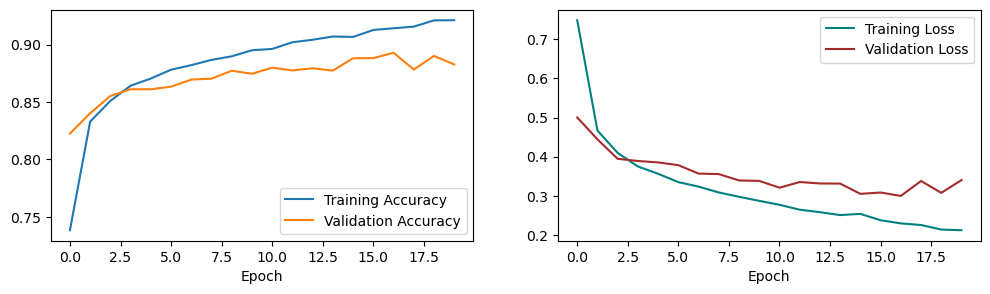

In [38]:
plt.subplots(figsize=(12,3))

plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='teal')
plt.plot(history.history['val_loss'], label='Validation Loss', color='brown')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## Define class names

In [39]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

## Run classification evaluation

In [40]:
y_pred = argmax(mlp.predict(x_test), axis = 1)
report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print(report)

313/313 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top     0.8959    0.7830    0.8356      1000
     Trouser     0.9693    0.9790    0.9741      1000
    Pullover     0.8152    0.7060    0.7567      1000
       Dress     0.9143    0.8430    0.8772      1000
        Coat     0.6755    0.9180    0.7783      1000
      Sandal     0.9774    0.9530    0.9651      1000
       Shirt     0.7461    0.6670    0.7043      1000
     Sneaker     0.9182    0.9760    0.9462      1000
         Bag     0.9150    0.9790    0.9459      1000
  Ankle boot     0.9710    0.9390    0.9548      1000

    accuracy                         0.8743     10000
   macro avg     0.8798    0.8743    0.8738     10000
weighted avg     0.8798    0.8743    0.8738     10000



## Visualize confusion matrix

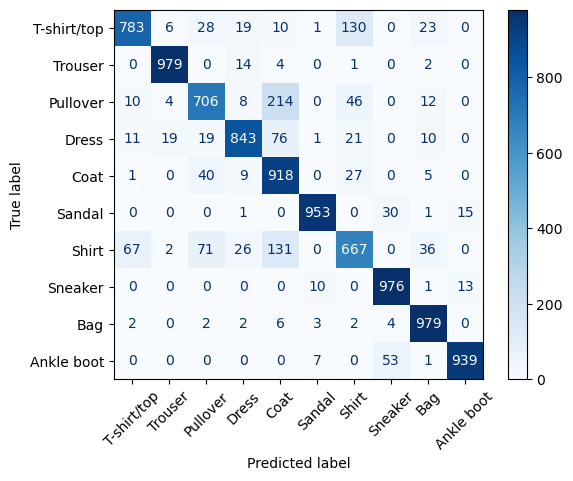

In [41]:
matrix = confusion_matrix(y_test, y_pred)
matrix_display = ConfusionMatrixDisplay(matrix, display_labels=class_names)
matrix_display.plot(cmap=plt.cm.Blues, xticks_rotation=45)